In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import csv

x=[]
y=[]
with open('6.txt') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            xx = float(row[0])
            yy = float(row[1])
            p =[xx]
            q =[yy]
            x.append(p)
            y.append(q)
                        
x=np.array(x)
x_batch=np.array(x)
y=np.array(y)
target=np.array(y)
n = len(x)

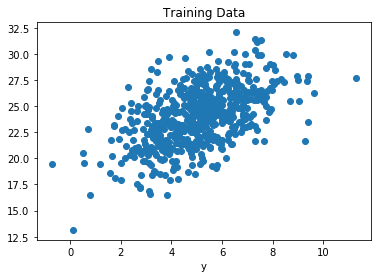

In [4]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [5]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [6]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

In [7]:
learning_rate = 0.01
training_epochs = 10

In [8]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
# optimizer = tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(cost)
# Global Variables Initializer 
init = tf.global_variables_initializer() 


W0930 21:59:52.759934  9028 deprecation.py:323] From C:\Users\Laptop\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    
    # Initializing the Variables 
    sess.run(init) 
    
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
        
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        
        # Displaying the result after every 50 epochs 
#         if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
        c = sess.run(cost, feed_dict = {X : x, Y : y}) 
        print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 


Epoch 1 : cost = 200.32115 W = 0.88380724 b = -0.25685003
Epoch 2 : cost = 120.2465 W = 1.7587566 b = -0.082134545
Epoch 3 : cost = 75.6814 W = 2.4106994 b = 0.0526015
Epoch 4 : cost = 50.8755 W = 2.8962748 b = 0.15750806
Epoch 5 : cost = 37.06398 W = 3.2577367 b = 0.24015708
Epoch 6 : cost = 29.369314 W = 3.52661 b = 0.30619738
Epoch 7 : cost = 25.077555 W = 3.7264094 b = 0.3598438
Epoch 8 : cost = 22.678604 W = 3.8746796 b = 0.4042398
Epoch 9 : cost = 21.332253 W = 3.9845114 b = 0.44173056
Epoch 10 : cost = 20.571198 W = 4.065663 b = 0.47406626


In [10]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 20.571198 Weight = 4.065663 bias = 0.47406626 



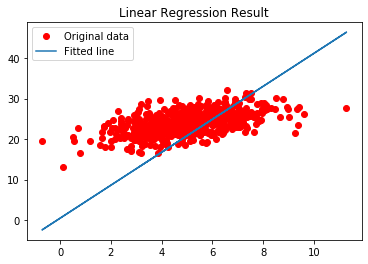

In [11]:
# Plotting the Results 
plt.plot(x_batch,target, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 


In [90]:
dataop = np.hstack((x,y))
print(dataop)
print(target)

[[ 3.10767103 27.37289283]
 [ 3.57352775 23.20047291]
 [ 6.40484764 24.53529251]
 ...
 [ 8.98156187 27.52386154]
 [ 4.20671194 19.12811548]
 [ 7.21898573 24.26658258]]
[[27.37289283]
 [23.20047291]
 [24.53529251]
 [25.09979706]
 [24.11725539]
 [23.77044438]
 [20.78951364]
 [23.08271883]
 [27.71022891]
 [24.94596276]
 [19.8870628 ]
 [23.16291903]
 [25.73266607]
 [25.92763322]
 [26.4663482 ]
 [26.76701167]
 [23.33190423]
 [23.6324325 ]
 [26.75115535]
 [25.42169095]
 [26.95820829]
 [23.00263712]
 [25.28999123]
 [19.03357628]
 [25.60457048]
 [26.57997965]
 [27.07344356]
 [26.52771299]
 [25.29610573]
 [28.50088512]
 [21.35824635]
 [23.53672452]
 [22.32872922]
 [26.21315901]
 [22.49335277]
 [19.43934858]
 [24.62516286]
 [24.10480865]
 [27.19157599]
 [21.02367842]
 [24.64161824]
 [20.32076409]
 [22.04126935]
 [23.21652842]
 [27.38566385]
 [19.59042285]
 [28.99859302]
 [24.14987573]
 [26.49269525]
 [18.56656829]
 [22.8071071 ]
 [27.74229462]
 [24.59655385]
 [25.20097273]
 [23.82791124]
 [23.09

In [93]:
#manual

msearray=[]
m,n = dataop.shape
data_plus_bias = np.c_[np.ones((m, 1)), dataop]
# print(data_plus_bias)

n_epochs = 100
learning_rate = 0.0001

X = tf.constant(data_plus_bias, dtype=tf.float32, name="X") 
y = tf.constant(target.reshape(-1, 1), dtype=tf.float32, name="y") 
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta") 
y_pred = tf.matmul(X, theta, name="predictions") 
error = y_pred - y 
mse = tf.reduce_mean(tf.square(error), name="mse") 
gradients = 2/m * tf.matmul(tf.transpose(X), error) 
training_op = tf.assign(theta, theta - learning_rate * gradients)
init = tf.global_variables_initializer()
with tf.Session() as sess:    
    sess.run(init)
    for epoch in range(n_epochs):
#         if epoch % 100 == 0:            
        print("Epoch", epoch, "MSE =", mse.eval())    
        msearray.append(mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()


Epoch 0 MSE = 1426.25
Epoch 1 MSE = 1096.4884
Epoch 2 MSE = 842.9895
Epoch 3 MSE = 648.1163
Epoch 4 MSE = 498.31042
Epoch 5 MSE = 383.14944
Epoch 6 MSE = 294.62125
Epoch 7 MSE = 226.56656
Epoch 8 MSE = 174.25055
Epoch 9 MSE = 134.03336
Epoch 10 MSE = 103.11694
Epoch 11 MSE = 79.350395
Epoch 12 MSE = 61.080177
Epoch 13 MSE = 47.03518
Epoch 14 MSE = 36.238247
Epoch 15 MSE = 27.938223
Epoch 16 MSE = 21.557646
Epoch 17 MSE = 16.65262
Epoch 18 MSE = 12.8819
Epoch 19 MSE = 9.983155
Epoch 20 MSE = 7.7547283
Epoch 21 MSE = 6.0415974
Epoch 22 MSE = 4.7246
Epoch 23 MSE = 3.7121208
Epoch 24 MSE = 2.933733
Epoch 25 MSE = 2.335291
Epoch 26 MSE = 1.8751937
Epoch 27 MSE = 1.521438
Epoch 28 MSE = 1.2494352
Epoch 29 MSE = 1.0402787
Epoch 30 MSE = 0.87942976
Epoch 31 MSE = 0.7557216
Epoch 32 MSE = 0.6605618
Epoch 33 MSE = 0.58734965
Epoch 34 MSE = 0.53100926
Epoch 35 MSE = 0.48763683
Epoch 36 MSE = 0.4542362
Epoch 37 MSE = 0.42849913
Epoch 38 MSE = 0.40865496
Epoch 39 MSE = 0.3933399
Epoch 40 MSE = 0.38

Text(0, 0.5, 'MSE')

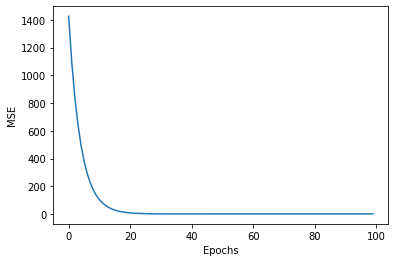

In [94]:
plt.plot(msearray)
plt.xlabel("Epochs")
plt.ylabel("MSE")